In [1]:
from glob import glob
import datetime

import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
from scipy.stats import spearmanr

# HR v Age - with Redshift cuts

Since we can't figure out what is happening, does it change with redshift?

In [2]:
dataset = 'campbell'   # 'gupta' or 'campbell' or 'campbellG'
z_max = 0.2   # campbell is already cut at  ~0.33

## Import HR

In [3]:
if dataset in ['campbell', 'campbellG']:
    # Campbell objects
    # Campbell uncorrected distances
    SNData = pd.read_csv('../data/CampbellHoltzman.tsv', sep='\t', usecols=['SNID', 'redshift', 'hr', 'err_mu'], index_col='SNID')
    SNData.rename(columns={'err_mu': 'hr uncert'}, inplace=True)
if dataset == 'gupta':
    # Gupta objects
    # Guptas cosmology
    SNData = pd.read_csv('../data/Gupta11_table2.tsv', sep='\t', skiprows=2, usecols=['x_1 uncert', 'HR'])#, index_col='SN ID')
    SNData.rename(columns={'x_1 uncert': 'hr', 'HR': 'hr uncert' }, inplace=True) # 'cause read_csv is shifting the headers over by one?
print(len(SNData))
SNData.head(5)

306


,redshift,hr uncert,hr
SNID,,,
10028,0.065392,0.090201,-0.212562
1032,0.129755,0.124407,-0.160149
10324,0.251725,0.151389,-0.331532
10550,0.300813,0.223295,0.187469
10559,0.281092,0.177469,0.039114


## Cut on Redshift

In [6]:
SNData = SNData[SNData['redshift']<z_max]
len(SNData)

110

## Import Ages

In [8]:
# number of samples desired
num = 50

In [10]:
# test= pd.concat([SNData, ages], axis=1)  ## ages dataframe is going away
test = SNData.copy()
test.dropna(inplace=True)  # drop rows that don't hae both HR & ages
for i in range(num):
    test['random age {}'.format(i)] = np.nan
# test.head(5)
test

,redshift,hr uncert,hr,random age 0,random age 1,random age 2,random age 3,random age 4,random age 5,random age 6,...,random age 40,random age 41,random age 42,random age 43,random age 44,random age 45,random age 46,random age 47,random age 48,random age 49
SNID,,,,,,,,,,,,,,,,,,,,,
10028,0.065392,0.090201,-0.212562,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1032,0.129755,0.124407,-0.160149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10805,0.045248,0.103240,-0.124423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11172,0.136329,0.103244,0.236458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12860,0.121679,0.065693,0.006525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12898,0.083581,0.061660,0.031662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12950,0.082734,0.059235,0.087723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13135,0.104671,0.070076,-0.087456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13354,0.157625,0.084229,-0.051242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**NOTICE:**

**THIS WILL TAKES A VERY LONG TIME**


In [11]:
if dataset == 'gupta':
    files = '../resources/SN{}_gupta_chain.tsv'
if dataset == 'campbell':
    files = '../resources/SN{}_campbell_chain.tsv'
if dataset == 'campbellG':
    files = '../resources/SN{}_campbellG_chain.tsv'

# for i in SNData.index.values:
for i in test.index.values:
    # So this works with only a partical dataset
    try:
        ages_ = pd.read_csv(files.format(i), sep='\t', skiprows=[1],
                            usecols=['age'], dtype={'age': np.float64})
        # Get 10 random values of ages_
        # Use randint because it is half open: [low, high)
        # https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html
        # Unlike random_integer
        index=np.random.randint(len(ages_), size=num)
        # add the randomly collected ages to the dataframe.
        # `.loc` allows access to the `num` random age "cells"
        # `.values` takes the ages_ from a series to a array
        # `.reshape` takes the (`num`,1) column array and makes it a horizontal array
        test.loc[i, 'random age 0':'random age {}'.format(num-1)] = ages_.values[index].reshape(num)
    except FileNotFoundError:
        # if data file is not there do nothing
        print(f'Skipping SN{i} becuase {files.format(i)} is not present')

# remove rows where no age was added
# should be a result of hitting the except block.
test.dropna(inplace=True)        

test.head(5)

,redshift,hr uncert,hr,random age 0,random age 1,random age 2,random age 3,random age 4,random age 5,random age 6,...,random age 40,random age 41,random age 42,random age 43,random age 44,random age 45,random age 46,random age 47,random age 48,random age 49
SNID,,,,,,,,,,,,,,,,,,,,,
10028,0.065392,0.090201,-0.212562,5.021950,7.031922,6.765062,5.365550,6.682115,5.784480,6.826733,...,5.350442,7.492970,5.778961,4.333692,6.621927,6.643529,6.874467,6.436116,6.200044,6.773299
1032,0.129755,0.124407,-0.160149,8.677093,5.353841,8.359814,2.301804,6.468294,5.582207,6.731893,...,9.043801,6.491489,4.739701,7.388177,9.562959,5.135929,1.839798,6.461399,9.212684,10.141585
10805,0.045248,0.103240,-0.124423,5.080200,5.669432,4.789445,5.861983,7.097189,7.815585,4.721923,...,6.559680,2.517099,3.058494,6.853034,3.993321,3.615480,4.324758,1.980524,1.641097,5.043248
11172,0.136329,0.103244,0.236458,5.289981,5.735702,5.514373,5.587012,5.515686,4.747500,4.742822,...,4.690307,4.660447,5.336998,5.103742,5.446819,5.541031,5.240088,4.755034,7.278918,5.216941
12860,0.121679,0.065693,0.006525,5.179370,1.908328,7.269001,5.042309,6.258514,6.331419,3.140654,...,6.797382,4.268447,7.596453,5.275908,0.331300,5.792763,4.730867,5.700513,4.987772,7.078567


In [12]:
# make sure you add the dtype, or else the regression plots do not work
plot = pd.DataFrame(columns=['hr', 'age'], dtype=np.float64)
plot.loc[0] = 1

for index in range(len(test)):
    for num_ in range(num):
# test.loc[index+1, 'random age {}'.format(num_)]
        # add a small bit of noice on the HR to let the linear fitting work.
        # this remvoes the fact that so many have the SAME HR.
        plot.loc[index*num+num_, ['hr', 'age']] = [test.iloc[index]['hr']+(test.iloc[index]['hr uncert']/3)*np.random.randn(1)[0],
                                                   test.iloc[index]['random age {}'.format(num_)]]
#         print(plot[index*num_+num_, ['hr', 'age']])
#         plot.loc[index_*num_+num_, ['hr', 'age']] = test[index, 'random age {}'.format(num_)]

plot.head(5)

,hr,age
0,-0.158116,5.021950
1,-0.238214,7.031922
2,-0.214876,6.765062
3,-0.141592,5.365550
4,-0.182147,6.682115


## Make plot

In [14]:
# Set plot configurations

## ylim changes
if dataset == 'gupta':
    ylim = (-0.5, 0.5)
else:
    ylim = (-0.75, 0.75)

## global v local labels
if dataset in ['gupta', 'campbellG']:
    xlabel = 'global age [Gyr]'
else:
    xlabel = 'local age [Gyr]'
    
    
## Savefig
uuid = 0   #need a place holder
if dataset == 'gupta':
    savename = f'GlobalHRvAge{uuid}.pdf'
elif dataset == 'campbellG':
    savename = f'campbellG-HRvAge{uuid}.pdf'
elif dataset == 'campbell':
    savename = f'LocalHRvAge{uuid}.pdf'
else:
    savename = f'HRvAge{uuid}.pdf'

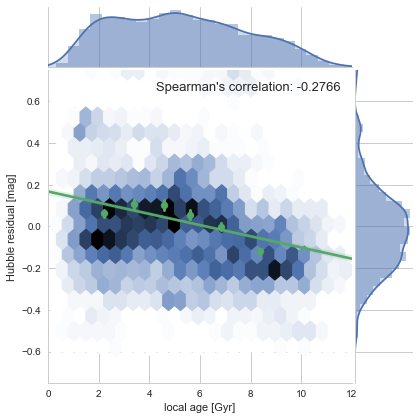

In [16]:
#'rug':True in marginal_kws, makes it very slow and looks like a solid line
g = sns.jointplot(plot['age'], plot['hr'], stat_func=spearmanr, kind="hex", gridsize=25,
                  bins=None, space=0.05, xlim=(0,12),  ylim=ylim, #ylim=(-0.75, 1.4),
                  marginal_kws={'kde':True, 'hist':True,
                                'kde_kws':{"shade":True}
                               })

# g = g.plot_joint(plt.scatter, alpha=0) #skip green color
g = g.plot_joint(sns.regplot, x_bins=6)#,  # not really needed anymore
#                  ci=68)

# This is plotted on top of jointplot's forced marginals
# g = g.plot_marginals(sns.distplot, kde=True)  # currently the best option
# g = g.plot_marginals(sns.distplot, kde=True, hist=False, kde_kws={"shade" : True})
# g = g.plot_marginals(sns.kdeplot, shade=True, cumulative=True, hist=False)

g = g.annotate(spearmanr, stat="Spearman's correlation",
               loc="upper right", fontsize=13, 
               template="{stat}: {val:.4f}")
# it looks like <abs(0.3) for spearman r is not very correlated.

g = g.set_axis_labels(xlabel, 'Hubble residual [mag]')

uuid = datetime.datetime.now().strftime('%Y%m%d%H%M%S')
# g.savefig(savename)
g.savefig('HRvAge-campbell-local-uncorrected-z0.2.pdf')
plt.show()